# Generating SQL for MySQL using Ollama, Qdrant
This notebook runs through the process of using the `vanna` Python package to generate SQL using AI (RAG + LLMs) including connecting to a database and training. If you're not ready to train on your own database, you can still try it using a sample [SQLite database](app.md).


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which LLM do you want to use?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../mysql-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI via Vanna.AI (Recommended)</div>
        <small class="w-full">Use Vanna.AI for free to generate your queries</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../mysql-openai-standard-qdrant/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI</div>
        <small class="w-full">Use OpenAI with your own API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../mysql-openai-azure-qdrant/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Azure OpenAI</div>
        <small class="w-full">If you have OpenAI models deployed on Azure</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../mysql-anthropic-qdrant/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Anthropic</div>
        <small class="w-full">Use Anthropics Claude with your Anthropic API Key</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> Ollama</div>
        <small class="w-full">Use Ollama locally for free. Requires additional setup.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../mysql-gemini-qdrant/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Google Gemini</div>
        <small class="w-full">Use Google Gemini with your Gemini or Vertex API Key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../mysql-mistral-qdrant/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Mistral via Mistral API</div>
        <small class="w-full">If you have a Mistral API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../mysql-other-llm-qdrant/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other LLM</div>
        <small class="w-full">If you have a different LLM model</small>
      </div>
    </a>
  </li>
    
</ul>
    


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Where do you want to store the 'training' data?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../mysql-ollama-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Vanna Hosted Vector DB (Recommended)</div>
        <small class="w-full">Use Vanna.AIs hosted vector database (pgvector) for free. This is usable across machines with no additional setup.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../mysql-ollama-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">ChromaDB</div>
        <small class="w-full">Use ChromaDBs open-source vector database for free locally. No additional setup is necessary -- all database files will be created and stored locally.</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> Qdrant</div>
        <small class="w-full">Use Qdrants open-source vector database</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../mysql-ollama-marqo/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Marqo</div>
        <small class="w-full">Use Marqo locally for free. Requires additional setup. Or use their hosted option.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../mysql-ollama-other-vectordb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other VectorDB</div>
        <small class="w-full">Use any other vector database. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
</ul>
    

## Setup

In [1]:
%pip install 'vanna[qdrant,ollama,mysql]'

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.2/213.2 KB 1.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.8 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 4.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 3.2 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 KB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.8/324.8 KB 8.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 KB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.0/331.0 KB 3.6 MB/s eta 0:00:00a 0:00:01
  Created wheel for flasgger: filename=flasgger-0.9.7.1-py2.py3-none-any.whl size=3865188 sha256=fc5ebf4

In [ ]:
from vanna.ollama import Ollama
from vanna.qdrant import Qdrant_VectorStore
from qdrant_client import QdrantClient



In [1]:
from vanna.qdrant import Qdrant_VectorStore
from vanna.ollama import Ollama

/home/azmin/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from qdrant_client import QdrantClient
from vanna.qdrant import Qdrant_VectorStore
from vanna.ollama import Ollama

class MyVanna(Qdrant_VectorStore, Ollama):
    def __init__(self, config=None):
        Qdrant_VectorStore.__init__(self, config=config)
        Ollama.__init__(self, config=config)

# Instantiate the QdrantClient properly
client = QdrantClient(url="http://192.168.110.216")

# Now pass the client object instead of the string representation
vn = MyVanna(config={'client': client, 'model': 'deepseek-r1:8b'})


Fetching 5 files: 100%|██████████| 5/5 [00:09<00:00,  1.99s/it]



<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which database do you want to query?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../postgres-ollama-qdrant/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Postgres</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../mssql-ollama-qdrant/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Microsoft SQL Server</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> MySQL</div>
        <small class="w-full"></small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../duckdb-ollama-qdrant/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">DuckDB</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../snowflake-ollama-qdrant/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Snowflake</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../bigquery-ollama-qdrant/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">BigQuery</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-ollama-qdrant/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">SQLite</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../oracle-ollama-qdrant/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Oracle</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../other-database-ollama-qdrant/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other Database</div>
        <small class="w-full">Use Vanna to generate queries for any SQL database</small>
      </div>
    </a>
  </li>
    
</ul>
    

In [ ]:
vn.connect_to_mysql(host='localhost', dbname='sales_db', user='root', password='admindb', port=3306)

In [ ]:
# Process and store the list of tables (you can customize this as needed)


NameError: name 'df_tables' is not defined

## Training
You only need to train once. Do not train again unless you want to add more training data.

In [ ]:

# The information schema query may need some tweaking depending on your database. This is a good starting point.
df_information_schema = vn.run_sql("SELECT * FROM INFORMATION_SCHEMA.COLUMNS")


# This will break up the information schema into bite-sized chunks that can be referenced by the LLM
plan = vn.get_training_plan_generic(df_information_schema)
plan

# If you like the plan, then uncomment this and run it to train
# vn.train(plan=plan)



Train on Information Schema: def.information_schema ALL_PLUGINS
Train on Information Schema: def.information_schema APPLICABLE_ROLES
Train on Information Schema: def.information_schema CHARACTER_SETS
Train on Information Schema: def.information_schema CHECK_CONSTRAINTS
Train on Information Schema: def.information_schema COLLATIONS
Train on Information Schema: def.information_schema COLLATION_CHARACTER_SET_APPLICABILITY
Train on Information Schema: def.information_schema COLUMNS
Train on Information Schema: def.information_schema COLUMN_PRIVILEGES
Train on Information Schema: def.information_schema ENABLED_ROLES
Train on Information Schema: def.information_schema ENGINES
Train on Information Schema: def.information_schema EVENTS
Train on Information Schema: def.information_schema FILES
Train on Information Schema: def.information_schema GLOBAL_STATUS
Train on Information Schema: def.information_schema GLOBAL_VARIABLES
Train on Information Schema: def.information_schema KEYWORDS
Train on

In [ ]:

# The following are methods for adding training data. Make sure you modify the examples to match your database.

# DDL statements are powerful because they specify table names, colume names, types, and potentially relationships
vn.train(ddl="""
    CREATE TABLE IF NOT EXISTS my-table (
        id INT PRIMARY KEY,
        name VARCHAR(100),
        age INT
    )
""")

# Sometimes you may want to add documentation about your business terminology or definitions.
vn.train(documentation="Our business defines OTIF score as the percentage of orders that are delivered on time and in full")

# You can also add SQL queries to your training data. This is useful if you have some queries already laying around. You can just copy and paste those from your editor to begin generating new SQL.
vn.train(sql="SELECT * FROM my-table WHERE name = 'John Doe'")


In [ ]:
# Business Terminology Documentation
vn.train(documentation="""
    In our distribution company, we use several key entities within the ERPNext system to manage our operations efficiently. 
    Below are the key business terms we define and use in our system:

    - **Item**: Represents a product or service that we sell or purchase.
    - **Sales Invoice**: A document that reflects the sale of goods or services, including taxes, pricing, and payment terms.
    - **Sales Invoice Item**: An individual item listed within a sales invoice, detailing the specific product sold.
    - **Purchase Order**: A request document created by us to order goods or services from a supplier.
    - **Purchase Receipt**: A document indicating that goods have been received from a supplier, often tied to a purchase order.
    - **General Ledger**: The central record in the accounting system, capturing all financial transactions, including assets, liabilities, revenues, and expenses.
    - **Delivery Note**: A document confirming the dispatch of goods, typically used for deliveries to customers.
    - **Payment Entry**: A document representing a payment made or received, typically linking to an invoice or order.
    - **Territory**: A geographical area or market segment to which a sales or customer team is assigned.
    - **Customer**: A person or organization that buys goods or services from us.
    - **Warehouse**: A storage location used for managing inventory and goods.
    - **Customer Group**: A categorization of customers for easy segmentation, often based on sales volume or region.
    - **Item Group**: A categorization of items used for grouping similar products, helping with inventory management and reporting.
    - **Project**: An initiative or contract that involves a series of tasks, often used to manage customer orders, deliveries, and payments.
    - **Sales Person**: The employee responsible for managing customer relationships and sales transactions.
    - **User**: A person who interacts with the ERPNext system, with different roles and permissions assigned.
    
    These definitions help us streamline our processes, maintain consistency across departments, and ensure accurate data flow through our ERPNext system.
""")

# SQL Query for Managing Sales Data
vn.train(sql="""
    -- Get Payment details on date range
    SELECT 
        SUM(wi.paid_amount) AS total_payment
    FROM `tabPayment Entry` wi
    WHERE wi.posting_date BETWEEN '2023-01-01' AND '2023-02-28'

    -- Select all items associated with a specific sales invoice, including item details and quantities
    SELECT
        si.name AS sales_invoice,
        sii.item_code,
        sii.qty,
        sii.rate,
        sii.amount,
        sii.discount_amount
    FROM `tabSales Invoice` si
    JOIN `tabSales Invoice Item` sii ON si.name = sii.parent
    WHERE si.customer = 'Customer XYZ' AND si.docstatus = 1;

    -- Select purchase receipts linked to a specific purchase order, with received quantities and item details
    SELECT
        pr.name AS purchase_receipt,
        pri.item_code,
        pri.received_qty,
        pri.amount
    FROM `tabPurchase Receipt` pr
    JOIN `tabPurchase Receipt Item` pri ON pr.name = pri.parent
    WHERE pr.purchase_order = 'PO-1234' AND pr.docstatus = 1;

    -- Query to fetch payment entries linked to specific sales invoices
    SELECT
        pe.name AS payment_entry,
        pe.party_type,
        pe.party,
        pe.amount,
        pe.posting_date
    FROM `tabPayment Entry` pe
    JOIN `tabSales Invoice` si ON pe.reference_name = si.name
    WHERE si.customer = 'Customer XYZ' AND pe.docstatus = 1;

    -- Retrieve general ledger entries for a specific customer account
    SELECT
        gl.account,
        gl.debit,
        gl.credit,
        gl.posting_date
    FROM `tabGL Entry` gl
    WHERE gl.party_type = 'Customer' AND gl.party = 'Customer XYZ';

    -- Query for warehouse stock levels for a particular item
    SELECT
        wi.warehouse,
        wi.item_code,
        wi.actual_qty
    FROM `tabStock Ledger Entry` wi
    WHERE wi.item_code = 'Item ABC' AND wi.docstatus = 1;
""")


Adding documentation....
Info: Ollama parameters:
model=deepseek-r1:8b,
options={},
keep_alive=None
Info: Prompt Content:
[{"role": "system", "content": "The user will give you SQL and you will try to guess what the business question this query is answering. Return just the question without any additional explanation. Do not reference the table name in the question."}, {"role": "user", "content": "\n    -- Select all items associated with a specific sales invoice, including item details and quantities\n    SELECT\n        si.name AS sales_invoice,\n        sii.item_code,\n        sii.qty,\n        sii.rate,\n        sii.amount,\n        sii.discount_amount\n    FROM `tabSales Invoice` si\n    JOIN `tabSales Invoice Item` sii ON si.name = sii.parent\n    WHERE si.customer = 'Customer XYZ' AND si.docstatus = 1;\n\n    -- Select purchase receipts linked to a specific purchase order, with received quantities and item details\n    SELECT\n        pr.name AS purchase_receipt,\n        pri.it

'a0c052bb-1be1-563e-b1cd-fcb83f82584c-sql'

In [10]:
# At any time you can inspect what training data the package is able to reference
training_data = vn.get_training_data()
training_data

,id,question,content,training_data_type
0,a0c052bb-1be1-563e-b1cd-fcb83f82584c-sql,"<think>\nOkay, so I'm looking at this SQL quer...",\n -- Select all items associated with a sp...,sql
0,29079ef7-d5da-571d-8012-a1aa4ba10ded-doc,None,"\n In our distribution company, we use seve...",documentation


In [ ]:
# You can remove training data if there's obsolete/incorrect information. 
vn.remove_training_data(id='1-ddl')


## Asking the AI
Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.

SQL Prompt: [{'role': 'system', 'content': "You are a SQL expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Additional Context \n\n\n    In our distribution company, we use several key entities within the ERPNext system to manage our operations efficiently. \n    Below are the key business terms we define and use in our system:\n\n    - **Item**: Represents a product or service that we sell or purchase.\n    - **Sales Invoice**: A document that reflects the sale of goods or services, including taxes, pricing, and payment terms.\n    - **Sales Invoice Item**: An individual item listed within a sales invoice, detailing the specific product sold.\n    - **Purchase Order**: A request document created by us to order goods or services from a supplier.\n    - **Purchase Receipt**: A document indicating that goods have been received from a supplier, often t

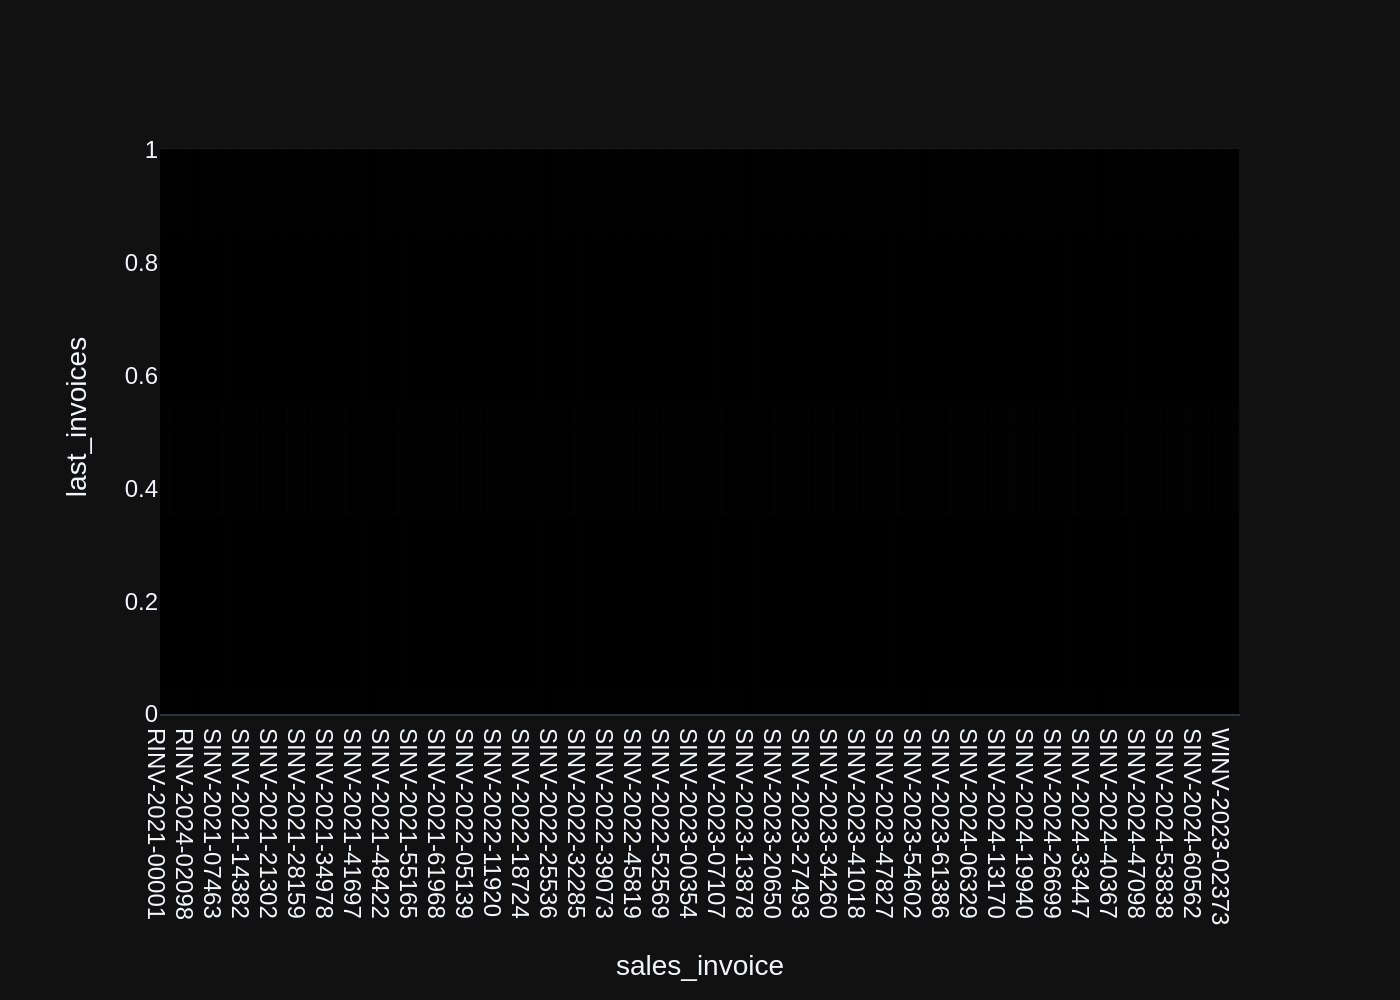

('SELECT \n    si.name AS sales_invoice,\n    -- Include other relevant fields as needed (e.g., customer, date)\n    COUNT(*) AS last_invoices\nFROM `tabSales Invoice` si\nWHERE docstatus = 1\nGROUP BY \n    si.name',
           sales_invoice  last_invoices
 0       RINV-2021-00001              1
 1       RINV-2021-00002              1
 2       RINV-2021-00003              1
 3       RINV-2021-00005              1
 4       RINV-2021-00006              1
 ...                 ...            ...
 254648  WINV-2025-00002              1
 254649  WINV-2025-00003              1
 254650  WINV-2025-00004              1
 254651  WINV-2025-00005              1
 254652  WINV-2025-00006              1
 
 [254653 rows x 2 columns],
 Figure({
     'data': [{'hovertemplate': 'sales_invoice=%{x}<br>last_invoices=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'orientation': 'v',
  

In [11]:
vn.ask(question="What's the last invoice?")

## Launch the User Interface
![vanna-flask](https://vanna.ai/blog/img/vanna-flask.gif)

In [12]:
from vanna.flask import VannaFlaskApp
app = VannaFlaskApp(vn)
app.run()

Your app is running at:
http://localhost:8084
 * Serving Flask app 'vanna.flask'
 * Debug mode: on


Traceback (most recent call last):
  File "/home/azmin/.local/lib/python3.10/site-packages/httpx/_transports/default.py", line 69, in map_httpcore_exceptions
    yield
  File "/home/azmin/.local/lib/python3.10/site-packages/httpx/_transports/default.py", line 233, in handle_request
    resp = self._pool.handle_request(req)
  File "/home/azmin/.local/lib/python3.10/site-packages/httpcore/_sync/connection_pool.py", line 216, in handle_request
    raise exc from None
  File "/home/azmin/.local/lib/python3.10/site-packages/httpcore/_sync/connection_pool.py", line 196, in handle_request
    response = connection.handle_request(
  File "/home/azmin/.local/lib/python3.10/site-packages/httpcore/_sync/connection.py", line 101, in handle_request
    return self._connection.handle_request(request)
  File "/home/azmin/.local/lib/python3.10/site-packages/httpcore/_sync/http11.py", line 143, in handle_request
    raise exc
  File "/home/azmin/.local/lib/python3.10/site-packages/httpcore/_sync/http11

## Next Steps
Using Vanna via Jupyter notebooks is great for getting started but check out additional customizable interfaces like the 
- [Streamlit app](https://github.com/vanna-ai/vanna-streamlit)
- [Flask app](https://github.com/vanna-ai/vanna-flask)
- [Slackbot](https://github.com/vanna-ai/vanna-slack)
